# Machine Learning Algorithms

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib.ticker import MaxNLocator
import keras

## Training Dataset

In [2]:
dft1 = pd.read_csv('TripA04.csv')
dft2 = pd.read_csv('TripA06.csv')
dft3 = pd.read_csv('TripA08.csv')
dft4 = pd.read_csv('TripA12.csv')
dft5 = pd.read_csv('TripA16.csv')
dft6 = pd.read_csv('TripA20.csv')
dft7 = pd.read_csv('TripA24.csv')
dft8 = pd.read_csv('TripA28.csv')
dft9 = pd.read_csv('TripA32.csv')
dft10 = pd.read_csv('TripB01.csv')
dft11 = pd.read_csv('TripB03.csv')
dft12 = pd.read_csv('TripB10.csv')
dft13 = pd.read_csv('TripB15.csv')
dft14 = pd.read_csv('TripB20.csv')
dft15 = pd.read_csv('TripB23.csv')
dft16 = pd.read_csv('TripB25.csv')
dft17 = pd.read_csv('TripB27.csv')
dft18 = pd.read_csv('TripB30.csv')
dft19 = pd.read_csv('TripB33.csv')
dft20 = pd.read_csv('TripB38.csv')
dft21 = pd.read_csv('TripA02.csv')
dft22 = pd.read_csv('TripA03.csv')
dft23 = pd.read_csv('TripA07.csv')
dft24 = pd.read_csv('TripA15.csv')
dft25 = pd.read_csv('TripA21.csv')
dft26 = pd.read_csv('TripA25.csv')
dft27 = pd.read_csv('TripA27.csv')
dft28 = pd.read_csv('TripB05.csv')
dft29 = pd.read_csv('TripB07.csv')
dft30 = pd.read_csv('TripB13.csv')
dft31 = pd.read_csv('TripB16.csv')
dft32 = pd.read_csv('TripB22.csv')
dft33 = pd.read_csv('TripB28.csv')
dft34 = pd.read_csv('TripB31.csv')
dft35 = pd.read_csv('TripB37.csv')

df = pd.concat([dft1, dft2, dft3, dft4, dft5, dft6, dft7, dft8, dft9, dft10, dft11, dft12, dft13, dft14, dft15, dft16, dft17, dft18, dft19, 
                dft20, dft21, dft22, dft23, dft24, dft25, dft26, dft27, dft28, dft29, dft30, dft31, dft32, dft33, dft34, dft35], ignore_index=True)
df.shape

(538214, 102)

In [3]:
# Extracting input variables and target variable from the dataset
Train_DF = df[['Battery Voltage [V]','Battery Current [A]','Battery Temperature [C]','SoC [%]']]

In [4]:
Train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538214 entries, 0 to 538213
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Battery Voltage [V]      538214 non-null  float64
 1   Battery Current [A]      538214 non-null  float64
 2   Battery Temperature [C]  496092 non-null  float64
 3   SoC [%]                  532403 non-null  float64
dtypes: float64(4)
memory usage: 16.4 MB


In [5]:
Train_DF.describe()

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
count,538214.000000,538214.000000,496092.000000,532403.000000
mean,376.137015,-21.815535,16.707009,65.893844
std,10.793452,43.691556,7.965289,12.973672
min,301.800000,-402.280000,-1.000000,19.600000
25%,369.820000,-33.640000,10.000000,59.500000
50%,378.930000,-12.670000,18.000000,68.200000
75%,384.066905,-2.600000,25.000000,75.400000
max,394.660000,143.840000,32.000000,86.600000


### Data Preprocessing

In [6]:
Train_DF.isna().sum()

Battery Voltage [V]            0
Battery Current [A]            0
Battery Temperature [C]    42122
SoC [%]                     5811
dtype: int64

In [7]:
Train_DF = Train_DF.fillna(method = 'bfill')
Train_DF.isna().sum()

C:\Users\moule\AppData\Local\Temp\ipykernel_5408\1450340318.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Train_DF = Train_DF.fillna(method = 'bfill')


Battery Voltage [V]        0
Battery Current [A]        0
Battery Temperature [C]    0
SoC [%]                    0
dtype: int64

In [8]:
Train_DF = Train_DF.sort_values(by='SoC [%]', ascending=False)
Train_DF

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
35770,391.57,-8.96,26.0,86.6
35782,390.97,-16.99,26.0,86.6
35792,390.83,-17.85,26.0,86.6
35791,390.82,-17.96,26.0,86.6
35790,390.87,-17.66,26.0,86.6
...,...,...,...,...
510698,339.38,-1.30,11.0,19.6
510696,338.25,-10.61,11.0,19.6
510695,338.10,-11.60,11.0,19.6
510694,338.10,-11.15,11.0,19.6


In [9]:
Train_DF.shape

(538214, 4)

## Test Dataset

In [10]:
dft_1 = pd.read_csv('TripA01.csv')
dft_2 = pd.read_csv('TripA09.csv')
dft_3 = pd.read_csv('TripA14.csv')
dft_4 = pd.read_csv('TripA17.csv')
dft_5 = pd.read_csv('TripA23.csv')
dft_6 = pd.read_csv('TripA30.csv')
dft_7 = pd.read_csv('TripB02.csv')
dft_8 = pd.read_csv('TripB06.csv')
dft_9 = pd.read_csv('TripB11.csv')
dft_10 = pd.read_csv('TripB19.csv')
dft_11 = pd.read_csv('TripB26.csv')
dft_12 = pd.read_csv('TripB36.csv')

df_test = pd.concat([dft_1, dft_2, dft_3, dft_4, dft_5, dft_6, dft_7, dft_8, dft_9, dft_10, dft_11, dft_12], ignore_index=True)
df_test.shape

(152119, 74)

In [11]:
# Extracting input variables and target variable from the dataset
Test_DF = df_test[['Battery Voltage [V]','Battery Current [A]','Battery Temperature [C]','SoC [%]']]

### Data Preprocessing

In [12]:
Test_DF.isna().sum()

Battery Voltage [V]        0
Battery Current [A]        0
Battery Temperature [C]    0
SoC [%]                    5
dtype: int64

In [13]:
Test_DF = Test_DF.fillna(method = 'bfill')
Test_DF.isna().sum()

C:\Users\moule\AppData\Local\Temp\ipykernel_5408\2831511208.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Test_DF = Test_DF.fillna(method = 'bfill')


Battery Voltage [V]        0
Battery Current [A]        0
Battery Temperature [C]    0
SoC [%]                    0
dtype: int64

In [14]:
Test_DF = Test_DF.sort_values(by='SoC [%]', ascending=False)
Test_DF

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
42171,390.30000,-20.05670,16.0,87.4
42128,390.50000,-19.45650,16.0,87.4
42140,390.40000,-19.30000,16.0,87.4
42139,390.43586,-19.55104,16.0,87.4
42138,390.48586,-19.90102,16.0,87.4
...,...,...,...,...
123316,347.56000,5.16000,15.0,21.2
123315,347.61000,5.34000,15.0,21.2
123314,347.66000,6.19000,15.0,21.2
123313,347.72000,7.07000,15.0,21.2


## Miscellaneous Dataset

In [15]:
dfm1 = pd.read_csv('TripA05.csv')
dfm2 = pd.read_csv('TripA10.csv')
dfm3 = pd.read_csv('TripA11.csv')
dfm4 = pd.read_csv('TripA13.csv')
dfm5 = pd.read_csv('TripA18.csv')
dfm6 = pd.read_csv('TripA19.csv')
dfm7 = pd.read_csv('TripA22.csv')
dfm8 = pd.read_csv('TripA26.csv')
dfm9 = pd.read_csv('TripA29.csv')
dfm10 = pd.read_csv('TripA31.csv')
dfm11 = pd.read_csv('TripB04.csv')
dfm12 = pd.read_csv('TripB08.csv')
dfm13 = pd.read_csv('TripB09.csv')
dfm14 = pd.read_csv('TripB12.csv')
dfm15 = pd.read_csv('TripB14.csv')
dfm16 = pd.read_csv('TripB17.csv')
dfm17 = pd.read_csv('TripB18.csv')
dfm18 = pd.read_csv('TripB21.csv')
dfm19 = pd.read_csv('TripB24.csv')
dfm20 = pd.read_csv('TripB29.csv')
dfm21 = pd.read_csv('TripB32.csv')
dfm22 = pd.read_csv('TripB34.csv')
dfm23 = pd.read_csv('TripB35.csv')

df_mis = pd.concat([dfm1, dfm2, dfm3, dfm4, dfm5, dfm6, dfm7, dfm8, dfm9, dfm10, dfm11, dfm12, dfm13, dfm14, dfm15, dfm16, dfm17, dfm18, dfm19, 
                dfm20, dfm21, dfm22, dfm23], ignore_index=True)
df_mis.shape

(404460, 75)

In [16]:
# Extracting input variables and target variable from the dataset
Mis_DF = df_mis[['Battery Voltage [V]','Battery Current [A]','Battery Temperature [C]','SoC [%]']]

### Data Preprocessing

In [17]:
Mis_DF.isna().sum()

Battery Voltage [V]            0
Battery Current [A]            0
Battery Temperature [C]        0
SoC [%]                    15438
dtype: int64

In [18]:
Mis_DF = Mis_DF.fillna(method = 'bfill')
Mis_DF.isna().sum()

C:\Users\moule\AppData\Local\Temp\ipykernel_5408\284891322.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mis_DF = Mis_DF.fillna(method = 'bfill')


Battery Voltage [V]        0
Battery Current [A]        0
Battery Temperature [C]    0
SoC [%]                    0
dtype: int64

In [19]:
Mis_DF = Mis_DF.sort_values(by='SoC [%]', ascending=False)
Mis_DF

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
58249,391.98,-10.03,22.0,88.5
58242,392.12,-9.81,22.0,88.5
58248,391.88,-11.44,22.0,88.5
58247,391.80,-12.63,22.0,88.5
58246,391.80,-12.78,22.0,88.5
...,...,...,...,...
375280,344.38,-5.59,14.0,15.4
375279,344.37,-5.32,14.0,15.4
375278,344.32,-4.77,14.0,15.4
375277,344.33,-4.70,14.0,15.4


## Splitting the Data into Training and Validation Subsets

In [20]:
# Separating the input features and target variable
X = Train_DF[['Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [C]']]
y = Train_DF['SoC [%]']

# Performing 80:20 train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Normalizing the Data

In [21]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [22]:
X_test = Test_DF[['Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [C]']]
y_test = Test_DF['SoC [%]'] 
X_test_scaled = scaler.transform(X_test)

In [23]:
X_mis = Mis_DF[['Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [C]']]
y_mis = Mis_DF['SoC [%]'] 
X_mis_scaled = scaler.transform(X_mis)

## Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

training_score_lr = lr_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_lr*100, 4))

validation_score_lr = lr_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(validation_score_lr*100, 4))

Training R2 Score (in %): 82.9611
Validation R2 Score (in %): 82.8506


In [73]:
testing_score_lr = lr_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_lr*100, 4))

Testing R2 Score (in %): 93.5213


In [74]:
mis_testing_score_lr = lr_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_lr*100, 4))

Miscellaneous Testing R2 Score (in %): 81.5465


## Lasso Regression

In [75]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01, random_state=42)

lasso_model.fit(X_train_scaled, y_train)

training_score_lasso = lasso_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_lasso*100, 4))

testing_score_lasso = lasso_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(testing_score_lasso*100, 4))

Training R2 Score (in %): 82.951
Validation R2 Score (in %): 82.843


In [76]:
testing_score_lasso = lasso_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_lasso*100, 4))

Testing R2 Score (in %): 93.3572


In [77]:
mis_testing_score_lasso = lasso_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_lasso*100, 4))

Miscellaneous Testing R2 Score (in %): 81.3621


## Ridge Regression

In [78]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=50, random_state=42)

ridge_model.fit(X_train_scaled, y_train)

training_score_ridge = ridge_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_ridge*100, 4))

validation_score_ridge = ridge_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(validation_score_ridge*100, 4))


Training R2 Score (in %): 82.9575
Validation R2 Score (in %): 82.8485


In [79]:
testing_score_ridge = ridge_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_ridge*100, 4))

Testing R2 Score (in %): 93.4173


In [80]:
mis_testing_score_ridge = ridge_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_ridge*100, 4))

Miscellaneous Testing R2 Score (in %): 81.4368


## Linear SVR

In [96]:
from sklearn.svm import LinearSVR

linear_svr_model = LinearSVR(epsilon=0.0, C=5.0, random_state=42)

linear_svr_model.fit(X_train_scaled, y_train)

training_score_linear_svr = linear_svr_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_linear_svr*100, 4))

validation_score_linear_svr = linear_svr_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(validation_score_linear_svr*100, 4))

Training R2 Score (in %): 81.9056
Validation R2 Score (in %): 81.8045


In [97]:
testing_score_linear_svr = linear_svr_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_linear_svr*100, 4))

Testing R2 Score (in %): 94.5503


In [98]:
mis_testing_score_linear_svr = linear_svr_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_linear_svr*100, 4))

Miscellaneous Testing R2 Score (in %): 81.979


## Decision Tree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

dt_model.fit(X_train_scaled, y_train)

training_score_dt = dt_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_dt*100, 4))

validation_score_dt = dt_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(validation_score_dt*100, 4))

Training R2 Score (in %): 99.9899
Validation R2 Score (in %): 96.5195


In [85]:
testing_score_dt = dt_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_dt*100, 4))

Testing R2 Score (in %): 85.4748


In [86]:
mis_testing_score_dt = dt_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_dt*100, 4))

Miscellaneous Testing R2 Score (in %): 71.3823


## AdaBoost Regressor

In [87]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = AdaBoostRegressor(n_estimators=50, random_state=42)

adaboost_model.fit(X_train_scaled, y_train)

training_score_adaboost = adaboost_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_adaboost*100, 4))

validation_score_adaboost = adaboost_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(validation_score_adaboost*100, 4))

Training R2 Score (in %): 74.1895
Validation R2 Score (in %): 74.2081


In [88]:
testing_score_adaboost = adaboost_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_adaboost*100, 4))

Testing R2 Score (in %): 77.1237


In [89]:
mis_testing_score_adaboost = adaboost_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_adaboost*100, 4))

Miscellaneous Testing R2 Score (in %): 62.9671


## MLP Regressor

In [90]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', batch_size=512, random_state=42, verbose=True)

mlp_model.fit(X_train_scaled, y_train)

training_score_mlp = mlp_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_mlp*100, 4))

validation_score_mlp = mlp_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(validation_score_mlp*100, 4))

Iteration 1, loss = 990.46598483
Iteration 2, loss = 55.77850156
Iteration 3, loss = 32.99084159
Iteration 4, loss = 19.78795660
Iteration 5, loss = 15.58851500
Iteration 6, loss = 13.62545088
Iteration 7, loss = 12.44616702
Iteration 8, loss = 11.83120550
Iteration 9, loss = 11.50311296
Iteration 10, loss = 11.33138775
Iteration 11, loss = 11.23308695
Iteration 12, loss = 11.11463533
Iteration 13, loss = 10.96612698
Iteration 14, loss = 10.81372804
Iteration 15, loss = 10.70306603
Iteration 16, loss = 10.60858222
Iteration 17, loss = 10.54548911
Iteration 18, loss = 10.49638350
Iteration 19, loss = 10.44874057
Iteration 20, loss = 10.40114307
Iteration 21, loss = 10.34779526
Iteration 22, loss = 10.29025921
Iteration 23, loss = 10.23298375
Iteration 24, loss = 10.17162535
Iteration 25, loss = 10.10897184
Iteration 26, loss = 10.05131502
Iteration 27, loss = 9.99561326
Iteration 28, loss = 9.94164780
Iteration 29, loss = 9.89022446
Iteration 30, loss = 9.84205848
Iteration 31, loss = 9

d:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training R2 Score (in %): 92.8503
Validation R2 Score (in %): 92.8617


In [91]:
testing_score_mlp = mlp_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_mlp*100, 4))

Testing R2 Score (in %): 94.7645


In [92]:
mis_testing_score_mlp = mlp_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_mlp*100, 4))

Miscellaneous Testing R2 Score (in %): 81.1827


## KNN Regressor

### Determining the best value of K using the elbow curve

In [24]:
from sklearn.neighbors import KNeighborsRegressor

k_values = range(1, 101) 

training_scores = []
validation_scores = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn_model.fit(X_train_scaled, y_train)
    
    training_score = knn_model.score(X_train_scaled, y_train)
    validation_score = knn_model.score(X_val_scaled, y_val)
    
    training_scores.append(training_score)
    validation_scores.append(validation_score)

In [27]:
tr_sc100 = [el*100 for el in training_scores]
vl_sc100 = [el*100 for el in validation_scores]

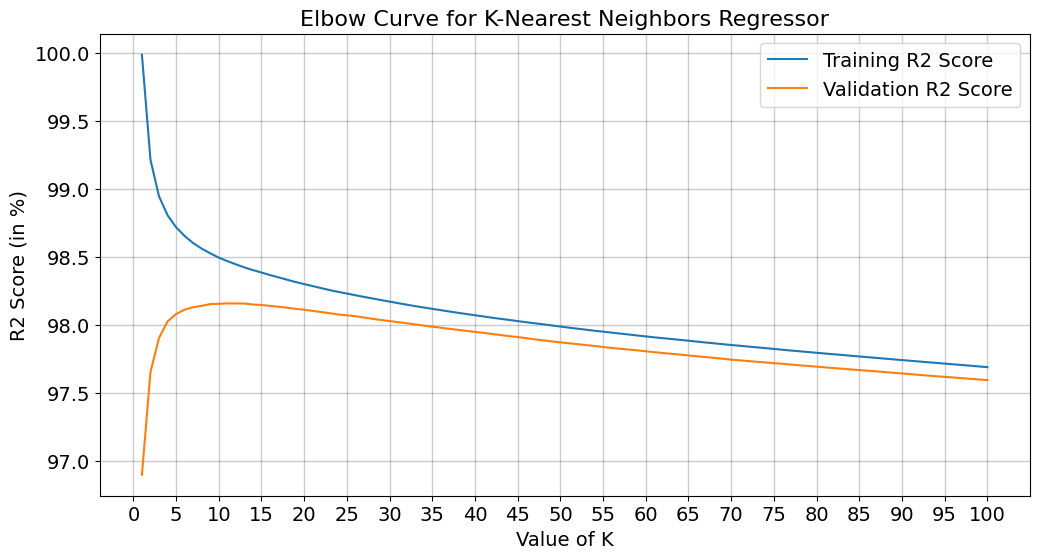

In [36]:
# Plot the results
plt.figure(figsize=(12,6))
plt.plot(k_values, tr_sc100, label='Training R2 Score')
plt.plot(k_values, vl_sc100, label='Validation R2 Score')
plt.xlabel('Value of K', color='black', fontsize=14)
plt.ylabel('R2 Score (in %)', color='black', fontsize=14)
plt.title('Elbow Curve for K-Nearest Neighbors Regressor', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(range(0, 105, 5))
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

The best value of K was found to be 5

In [53]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')  

knn_model.fit(X_train_scaled, y_train)

training_score_knn = knn_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_knn*100, 4))

validation_score_knn = knn_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(validation_score_knn*100, 4))


Training R2 Score (in %): 98.7171
Validation R2 Score (in %): 98.0798


In [54]:
testing_score_knn = knn_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_knn*100, 4))

Testing R2 Score (in %): 84.574


In [55]:
mis_testing_score_knn = knn_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_knn*100, 4))

Miscellaneous Testing R2 Score (in %): 72.0371


## XGBoost Regressor

In [56]:
import xgboost as xgb

In [57]:
# Creating an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

In [58]:
# Fitting the model on the training data
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
# Computing R2 scores
training_score_xgb = xgb_model.score(X_train_scaled, y_train)
validation_score_xgb = xgb_model.score(X_val_scaled, y_val)
testing_score_xgb = xgb_model.score(X_test_scaled, y_test)
mis_testing_score_xgb = xgb_model.score(X_mis_scaled, y_mis)

In [60]:
print('Training R2 Score (in %):', round(training_score_xgb*100, 4))
print('Validation R2 Score (in %):', round(validation_score_xgb*100, 4))
print('Testing R2 Score (in %):', round(testing_score_xgb*100, 4))
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_xgb*100, 4))

Training R2 Score (in %): 96.8006
Validation R2 Score (in %): 96.72
Testing R2 Score (in %): 90.1492
Miscellaneous Testing R2 Score (in %): 77.4607


## Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [31]:
training_score_rf = rf_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_rf*100, 4))

validation_score_rf = rf_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(validation_score_rf*100, 4))

Training R2 Score (in %): 99.7114
Validation R2 Score (in %): 97.9454


In [32]:
testing_score_rf = rf_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_rf*100, 4))

Testing R2 Score (in %): 89.2077


In [33]:
mis_testing_score_rf = rf_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_rf*100, 4))

Miscellaneous Testing R2 Score (in %): 75.8618


## Gradient Boosting Regressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [36]:
training_score_gb = gb_model.score(X_train_scaled, y_train)
print('Training R2 Score (in %):', round(training_score_gb*100, 4))

validation_score_gb = gb_model.score(X_val_scaled, y_val)
print('Validation R2 Score (in %):', round(validation_score_gb*100, 4))

Training R2 Score (in %): 93.5334
Validation R2 Score (in %): 93.4392


In [37]:
testing_score_gb = gb_model.score(X_test_scaled, y_test)
print('Testing R2 Score (in %):', round(testing_score_gb*100, 4))

Testing R2 Score (in %): 93.2566


In [38]:
mis_testing_score_gb = gb_model.score(X_mis_scaled, y_mis)
print('Miscellaneous Testing R2 Score (in %):', round(mis_testing_score_gb*100, 4))

Miscellaneous Testing R2 Score (in %): 79.7241


***